In [ ]:
import random
import matplotlib.pyplot as plt
import statistics as stat
from matplotlib.ticker import FormatStrFormatter
import numpy as np

In [ ]:
num = 100000
akarsh_warriors = [1,6,6,9]
alice_warriors = [3,4,6,7]

In [ ]:
def winP(x, y):
    return x / (x + y)

In [ ]:
def battle(alice_warrior, akarsh_warrior,alice_warriors, akarsh_warriors):
    prob_akarsh = winP(akarsh_warrior, alice_warrior)
    r = random.random()
    if r < prob_akarsh:
        akarsh_warriors.remove(akarsh_warrior)
        akarsh_warriors.append(akarsh_warrior + alice_warrior)
        alice_warriors.remove(alice_warrior)
        return
    else:
        alice_warriors.remove(alice_warrior)
        alice_warriors.append(alice_warrior + akarsh_warrior)
        akarsh_warriors.remove(akarsh_warrior)
        return


In [ ]:
def monte_carlo_simulation_max(akarsh_warriors, alice_warriors, num_simulations):
    wins = 0
    for i in range(num_simulations):
      akarsh_remaining = list(akarsh_warriors)
      alice_remaining  = list(alice_warriors)
      while len(akarsh_remaining)!=0 and len(alice_remaining)!=0:
            akarsh_warrior = max(akarsh_remaining)
            alice_warrior = random.choice(alice_remaining)
            battle(alice_warrior, akarsh_warrior,alice_remaining, akarsh_remaining)
      if bool(akarsh_remaining):
          wins = wins + 1
    return wins / num_simulations



In [ ]:
#prob_simul_max = []
#for i in range(1,1300) :
  #prob_simul_max.append(monte_carlo_simulation_max(akarsh_warriors, alice_warriors, i))
monte_carlo_simulation_max(akarsh_warriors, alice_warriors, num)
#plt.plot(prob_simul_max)
#plt.xlabel('Number of Simulations')
#plt.ylabel('Probability of Winning')

# Could not plot for 10^5 case as that has very high time complexity


0.52649

I planned to consider the case of "i" simulations and then sum up the probability for all of them and finally divide it by the number of simulations : alas the time complexity was too much and I could not do it in the stipulated time for 10^5 cases without using TPUs. I have done it for the 1300 case though and shown the graph below.

All of the rest of the graphs I have created in this assignment are for N = 1300 case and are only **representative** : as N increases the noise in the data will decrease but we already see a clear picture emerging.

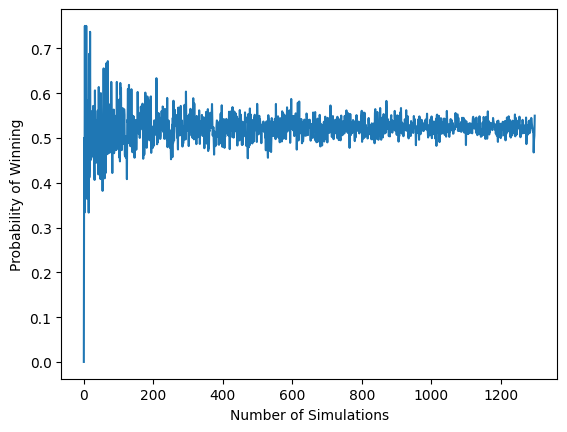

In [ ]:
#average_simulated_probability_max = stat.mean(prob_simul_max)
#print(average_simulated_probability_max)

In [ ]:
def monte_carlo_simulation_min(akarsh_warriors, alice_warriors, num):
    wins = 0
    for i in range(num):
      akarsh_remaining = list(akarsh_warriors)
      alice_remaining  = list(alice_warriors)
      while len(akarsh_remaining)!=0 and len(alice_remaining)!=0:
            akarsh_warrior = min(akarsh_remaining)
            alice_warrior = random.choice(alice_remaining)
            battle(alice_warrior, akarsh_warrior,alice_remaining, akarsh_remaining)
      if bool(akarsh_remaining):
          wins = wins + 1
    return wins / num


In [ ]:
#prob_simul_min = []
#for i in range(1,1300) :
 # prob_simul_min.append(monte_carlo_simulation_min(akarsh_warriors, alice_warriors, i))
monte_carlo_simulation_min(akarsh_warriors, alice_warriors, num)

#plt.plot(prob_simul_min)
#plt.xlabel('Number of Simulations')
#plt.ylabel('Probability of Winning')



0.5249

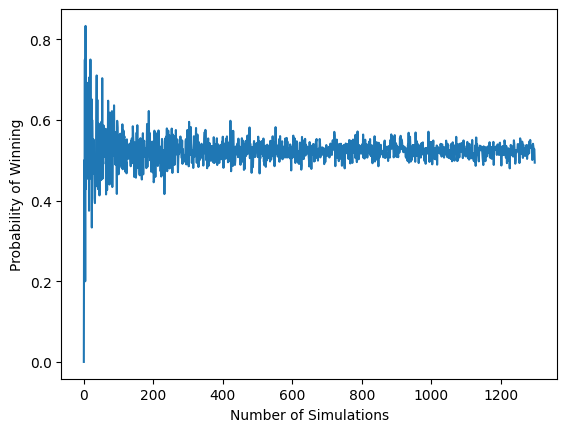

In [ ]:
#average_simulated_probability_min = stat.mean(prob_simul_min)
#print(average_simulated_probability_min)



We can explain the very small difference between the two cases by comparing the means of the two warrior sets

In [ ]:
print(stat.mean(akarsh_warriors))
print(stat.mean(alice_warriors))


5.5
5


As we can see, the difference between the means is quite less ; both are distributed somewhat similarly, and therefore taking a maximum or minimum value does not affect much in the long run

If the mean of our warrior data set was much lower than 5, then we would have a much lower winner probability , and if it was much higher than 5, we would have a higher win probability, as illustrated below

In [ ]:
sample_warriors_high = [9,9,9,9]
monte_carlo_simulation_max(sample_warriors_high, alice_warriors, num)

0.64015

In [ ]:
sample_warriors_low = [1,1,1,1]
monte_carlo_simulation_min(sample_warriors_low, alice_warriors, num)

0.16687

The battles are fair : consider that the gain on winning is y and the loss on losing is y : weighted probability sum of these two values leads to a 0 : clearly the **expected gain is 0** and the battles are fair

We do a little exercise below to show that expected gain is close to 0. As N increases, expected gain gets closer to 0.

In [ ]:
def Expected_Value(akarsh_warriors, alice_warriors, num):
    netExp = 0

    for i in range(num):
        akarsh_remaining = list(akarsh_warriors)
        alice_remaining = list(alice_warriors)
        exp = 0

        while akarsh_remaining and alice_remaining:
            akarsh_warrior = max(akarsh_remaining)
            alice_warrior = random.choice(alice_remaining)
            akarsh_remaining.remove(akarsh_warrior)
            alice_remaining.remove(alice_warrior)

            chances = winP(akarsh_warrior, alice_warrior)
            result = random.random()

            if result < chances:
              # Gain is equal to strength of alice_warrior when my_warrior wins the match.
                akarsh_remaining.append(akarsh_warrior + alice_warrior)
                exp += alice_warrior
            elif result > chances:
              # Loss is equal to strength of my_warrior when my_warrior loses the match.
                alice_remaining.append(akarsh_warrior + alice_warrior)
                exp -= akarsh_warrior
            else:
              # No change in case of draw
                exp += 0;

        netExp += exp

    return netExp/num

In [ ]:
Expected_Value(akarsh_warriors, alice_warriors, num)

-0.09238

Now, I have to devise an optimal strategy but the question is, does there exist one ?

Then let us seek a proof based on induction. Let us suppose that Akarsh has n warriors of strenghts x_i each and Alice has n warriors of strength y_i each

Let strength of Akarsh's warriors be $x_1, x_2,..., x_n$.

and that of Alice's warriors be $y_1, y_2,..., y_n$.

Let $P(n,m)$ be the probability of winning when Akarsh and Alice have n, m warriors left, respectively.
$$
Claim: winP = \frac {\sum_{i=1}^n x_{i}}{\sum_{i=1}^{n} x_i + \sum_{i=1}^{m} y_i}
$$
What we essentially seek to do here is run two inductions since there are two different indices running on $x$ and $y$

**STEP 1: Let Akarsh have $n$ warriors and Alice has one warrior.**

Claim: $$winP = \frac{\sum_{i=1}^{n} x_i}{\sum_{i=1}^{n} x_i + y_1}$$

Proof: Use induction on $n$ = Number of warriors of Akarsh

Base case: Akarsh and Alice have exactly one warrior; then $winP = \frac{x_1}{x_1+y_1}$. The base case is obvious.

Induction step: Let Akarsh has $n-1$ warriors and Alice has one warrior i.e.

$$
winP = \frac{\sum_{i=1}^{n-1} x_i}{\sum_{i=1}^{n-1} x_i + y_1}
$$

Now, if Akarsh has $n$ warriors, then he is free to pick any one warrior for the first fight against warrior with strength $y_1$.

By considering a general x_k we prove that probabilty of win will be same regardless of the choice of k.

Probability of winning the first match is {x_k}/{x_k+y_1} and that of losing is {y_1}/{x_k+y_1}. Hence,


P(n,1) = {x_k}/{x_k+y_1}* P(n,0) + {y_1}/{x_k+y_1}*P(n-1,1)


P(n,0) is 1 as Alice has no warriors left. $P(n-1,1)$ is $\frac{\sum_{i=1}^{k-1} x_i+\sum_{i=k+1}^{n} x_i}{\sum_{i=1}^{n-1} x_i + y_1+x_n}$ as strength of $y_1$ is increased to $y_1+x_n$.

$$
P(n,1) = \frac{x_k}{x_k+y1} + \frac{y_1}{x_k+y1}\times \frac{\sum_{i=1}^{k-1} x_i+\sum_{i=k+1}^{n} x_i}{\sum_{i=1}^{n-1} x_i + y_1+x_n}
$$
$$
= \frac{\sum_{i=1}^{n} x_i}{\sum_{i=1}^{n} x_i + y_1}
$$
Hence we have here proved that $winP$ when Alice has one warrior and Akarsh has $n$ warriors is only dependent on strengths and $n$ and has absolutely nothing to do with the strategy deployed.

**STEP 2: Prove for a general case where both Alice and Akarsh can have multiple warriors.**

Here, assume number of warriors of Akarsh to be constant and proceed with induction on the number of warriors of Alice.

Base Case: Proved the base case in STEP 1.

Induction Case: Consider that Alice has $m-1$ warriors i.e. winP =

$$
P(n,m-1) = \frac{\sum_{i=1}^{n}x_i}{\sum_{i=1}^{n}x_i+\sum_{i=1}^{m-1}y_i} \text{ and } P(n-1, m) = \frac{\sum_{i=1}^{n-1}x_i}{\sum_{i=1}^{n-1}x_i+\sum_{i=1}^{m}y_i}
$$

Now, let Alice have $m$ warriors. Then,

$$
P(n,m) = \frac{x_j}{x_j+y_k}\times P(n,m-1) + \frac{y_k}{x_j+y_k}\times P(n-1,m)
$$

Here,
$$
P(n,m-1) = \frac{\sum_{i=1}^{n}x_i+y_k}{\sum_{i=1}^{n}x_i+\sum_{i=1}^{m}y_i}  
\text{ and } P(n-1,m) = \frac{\sum_{i=1}^{n}x_i-x_j}{\sum_{i=1}^{n}x_i+\sum_{i=1}^{m}y_i}
$$

Using these values we obtain,

$$
P(n,m) = \frac{\sum_{i=1}^{n}x_i}{\sum_{i=1}^{n}x_i+\sum_{i=1}^{m}y_i}
$$

$$
\text{Hence proved.}
$$

$$
\text{Based on above proof, it is easy to see that the probability of winning is independent of the strategy deployed !}\\
\text{winP}
= \frac{AkarshTotalStrength}{AliceTotalStrength}\\
= \frac{1+9+6+6}{(3+4+6+7) + (1+9+6+6)}\\
= \frac{22}{42}\\
= 0.52380952381
$$

I can think of two more possible cases; say Alice makes a choice and then as per the choice of Alice, Akarsh picks up a warrior that is just more powerful than Alice's warrior, or just less powerful than Alice's warrior. We are already done picking the most powerful or the least powerful guy. We can then plot winning probability for varying number of simulations and compare how our winning chances fare.

In [ ]:
def just_larger(list_warriors, number) :
  if max(list_warriors) <= number :
    return max(list_warriors)
  else :
    for i in range(len(list_warriors)):
      if list_warriors[i] > number :
        return list_warriors[i]
        break



In [ ]:
l = [2,4,6,7,8]
just_larger(l,9)

8

In [ ]:
def monte_carlo_simulation_strategy_1(akarsh_warriors, alice_warriors, num):
    wins = 0
    for i in range(num):
      akarsh_remaining = list(akarsh_warriors)
      alice_remaining  = list(alice_warriors)
      while len(akarsh_remaining)!=0 and len(alice_remaining)!=0:
            alice_warrior = random.choice(alice_remaining)
            akarsh_warrior = just_larger(akarsh_remaining, alice_warrior)
            battle(alice_warrior, akarsh_warrior,alice_remaining, akarsh_remaining)
      if bool(akarsh_remaining):
          wins = wins + 1
    return wins / num


In [ ]:
#prob_simul_strategy_1 = []
#for i in range(1,1300) :
 # prob_simul_strategy_1.append(monte_carlo_simulation_strategy_1(akarsh_warriors, alice_warriors, i))
monte_carlo_simulation_strategy_1(akarsh_warriors, alice_warriors, num)
#plt.plot(prob_simul_strategy_1)
#plt.xlabel('Number of Simulations')
#plt.ylabel('Probability of Winning')



0.52076

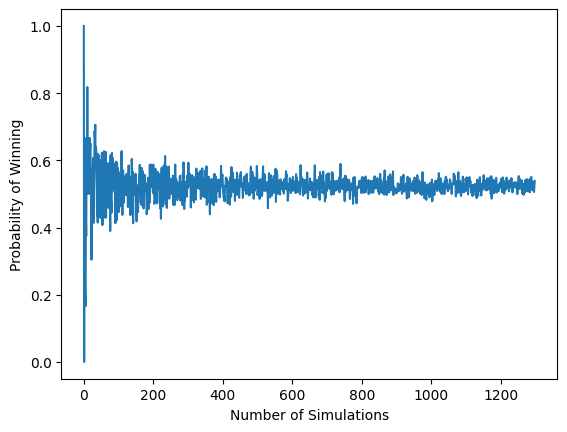

In [ ]:
#average_simulated_probability_strategy_1 = stat.mean(prob_simul_strategy_1)
#print(average_simulated_probability_strategy_1)


In [ ]:
def just_smaller(list_warriors, number) :
  if min(list_warriors) >= number :
    return min(list_warriors)
  if (max(list_warriors) <= number) :
    return max(list_warriors)
  else :
    for i in range(len(list_warriors)):
      if list_warriors[i] > number :
        return list_warriors[i-1]
        break


In [ ]:
l = [1,4,5,7,8]
just_smaller(l,9)

8

In [ ]:
def monte_carlo_simulation_strategy_2(akarsh_warriors, alice_warriors, num):
    wins = 0
    for i in range(num):
      akarsh_remaining = list(akarsh_warriors)
      alice_remaining  = list(alice_warriors)
      while len(akarsh_remaining)!=0 and len(alice_remaining)!=0:
            alice_warrior = random.choice(alice_remaining)
            akarsh_warrior = just_smaller(akarsh_remaining, alice_warrior)
            battle(alice_warrior, akarsh_warrior,alice_remaining, akarsh_remaining)
      if bool(akarsh_remaining):
          wins = wins + 1
    return wins / num


In [ ]:

#prob_simul_strategy_2 = []
#for i in range(1,num) :
#  prob_simul_strategy_2.append(monte_carlo_simulation_strategy_2(akarsh_warriors, alice_warriors, i))
monte_carlo_simulation_strategy_2(akarsh_warriors, alice_warriors, num)
#plt.plot(prob_simul_strategy_2)
#plt.xlabel('Number of Simulations')
#plt.ylabel('Probability of Winning')



0.52313

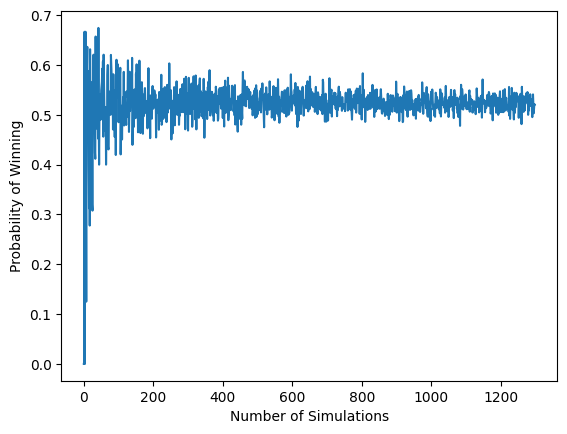

In [ ]:
#average_simulated_probability_strategy_2 = stat.mean(prob_simul_strategy_2)
#print(average_simulated_probability_strategy_2)


In [ ]:
#fig, ax = plt.subplots()
#ax.plot(prob_simul_max, color = 'blue')
#ax.plot(prob_simul_min, color = 'red')
#ax.plot(prob_simul_strategy_1, color = 'green')
#ax.plot(prob_simul_strategy_2, color = 'orange')

#ax.set_xlabel('Number of simulations')
#ax.set_ylabel('Probability of Winning')
#ax.set_title('Monte-Carlo Simulation of Different Strategies')

In [ ]:
#fig, ax = plt.subplots()
#ax.axhline(y = average_simulated_probability_strategy_2, color = 'orange')
#ax.axhline(y = average_simulated_probability_strategy_1, color = 'green')
#ax.axhline(y = average_simulated_probability_max, color = 'blue')
#ax.axhline(y = average_simulated_probability_min, color = 'red')
#y_ticks = np.arange(0.520, 0.530, 0.001)
#ax.set_yticks(y_ticks)
#ax.set_ylim(0.520,0.530)


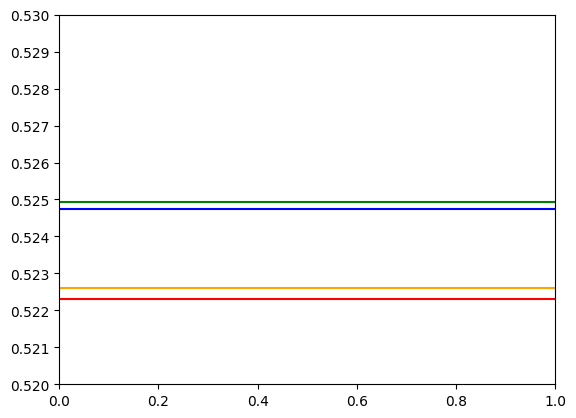

What I did was : find average probability after 1300 simulations (time limits) and compare them. All of them lie in a very small interval. I have the Monte Carlo simulation for 10^5 simulations as well : adding those many values was difficult.

We can see here that there is only a marginal difference in any strategy that we might use in the game. The theoretical value for the probability of winning is 0.52380952381 and all of the mean values that we have obtained and pretty close to that ; in fact amongst these values there is only an error of the third order. Still, we might do a Monte Carlo simulation of the total power on the third case ( for fun )

In [ ]:
def monte_carlo_simulation_total_Power(akarsh_warriors, alice_warriors, num):

    total_power = [[] for _ in range(num)]

    fig, ax = plt.subplots()
    for i in range(num):

      akarsh_remaining = list(akarsh_warriors)
      alice_remaining  = list(alice_warriors)
      while len(akarsh_remaining)!=0 and len(alice_remaining)!=0:
            alice_warrior = random.choice(alice_remaining)
            akarsh_warrior = just_larger(akarsh_remaining, alice_warrior)
            battle(alice_warrior, akarsh_warrior,alice_remaining, akarsh_remaining)
            total_power[i].append(sum(akarsh_remaining))
     # ax.plot(total_power[i])
     # ax.set_xlabel('Number of Battles')
     # ax.set_ylabel('Total Power')

    return total_power


In [ ]:
#num = 1300
#alice_warriors = [3,4,6,7]
#karsh_warriors = [1,6,6,9]
#for i in range(1,num) :
#monte_carlo_simulation_total_Power(akarsh_warriors, alice_warriors, 1300)



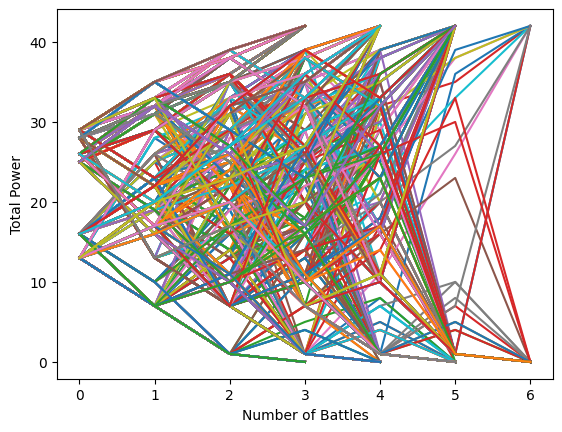

This is a Monte Carlo simulatio where we progress total power with number of battles that we have fought.

In [ ]:
def monte_carlo_simulation_total_power(akarsh_warriors, alice_warriors, num):

    total_power = []

    fig, ax = plt.subplots()
    for i in range(num):

      akarsh_remaining = list(akarsh_warriors)
      alice_remaining  = list(alice_warriors)
      while len(akarsh_remaining)!=0 and len(alice_remaining)!=0:
            alice_warrior = random.choice(alice_remaining)
            akarsh_warrior = just_larger(akarsh_remaining, alice_warrior)
            battle(alice_warrior, akarsh_warrior,alice_remaining, akarsh_remaining)
            total_power.append(sum(akarsh_remaining))
      #ax.plot(i,total_power[i], marker = 'o' , markersize = 4 , color = 'orange')
      #ax.set_xlabel('Simulation Number')
      #ax.set_ylabel('Total Power')

    return total_power


I simulated total power at the end of each tournament and plotted it here. Did not execute the function due to time constraints.

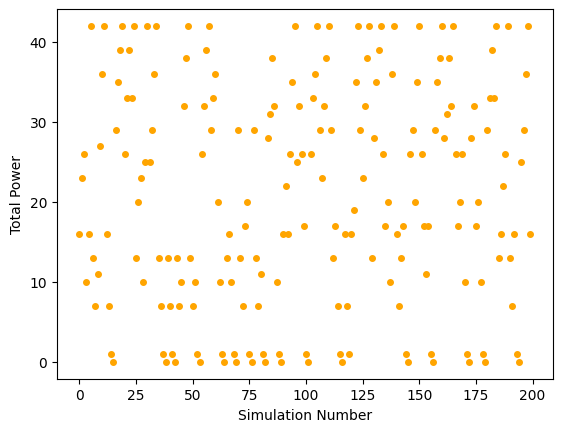

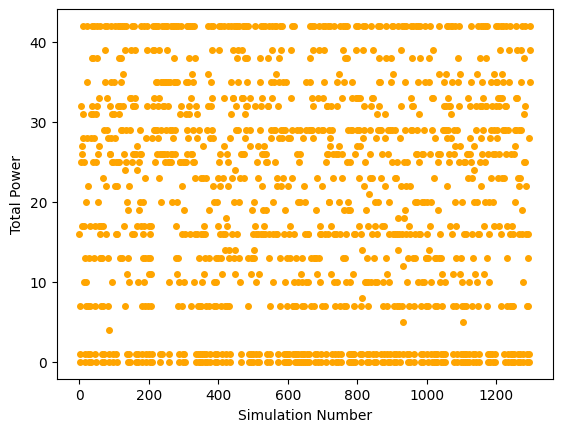